In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)

import matplotlib.pyplot as plt
import seaborn as sns


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10eb26ee0>>
Traceback (most recent call last):
  File "/Users/micheleterribile/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [4]:
df = pd.read_excel(
    "/Users/micheleterribile/Desktop/Masters AI 2025-2026/Study Units/Applied Machine Learning/Applied Machine Learning DS.xlsx",
    sheet_name="Cleaned DS"
)


# Binary target
df['severe_accident'] = df['severity (Fatal/High/Med/Low/no)'].apply(
    lambda x: 1 if x in ['Fatal', 'High'] else 0
)

# Feature selection
features = [
    'day_of_the_week',
    'time (Morning/Afternoon/Evening/Night)',
    'time_in_hours (00 - 23)',
    'rush_hour (6-8am 4-6pm)',
    'weekend_weekday',
    'locality',
    'road_name',
    'road_type (bypass, residential street, junction, roundabout)',
    'vehicle_count',
    'vehicle_involved (car-motorcycle, car-car, car-truck, car-pedestrian, bus-truck, car-bus, truck-motorcycle, car-karozzin, truck-bike)',
    'male_count',
    'female_count',
    'total_driver_count',
    'min_age',
    'max_age',
    'young_driver_involved (<25)',
    'adult_driver_involved',
    'senior_driver_involved (>60)',
    'child_involved (<16)',
    'senior_involved (>60)',
    'visibility',
    'wind_speed',
    'temperature',
    'ambulance_called'
]


X = df[features]
y = df['severe_accident']


In [5]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
# Ensure categorical columns are strings
X[categorical_features] = X[categorical_features].astype(str)

# ----------------------------
# Train-test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


/var/folders/t8/lj0f9yld44d2gpnrcfkjy4q00000gn/T/ipykernel_49937/2112503287.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_features] = X[categorical_features].astype(str)


              precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.79      0.73      0.76        15

    accuracy                           0.87        55
   macro avg       0.84      0.83      0.84        55
weighted avg       0.87      0.87      0.87        55

ROC-AUC: 0.9266666666666667


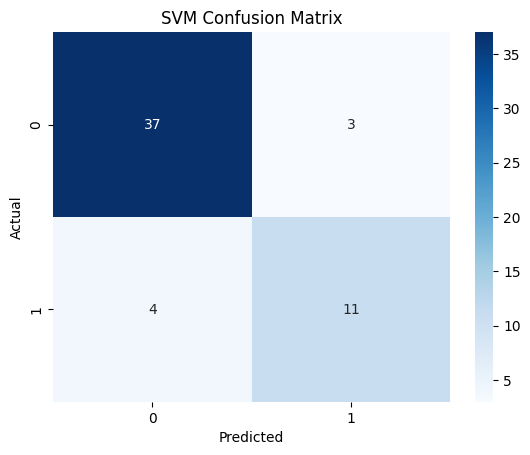

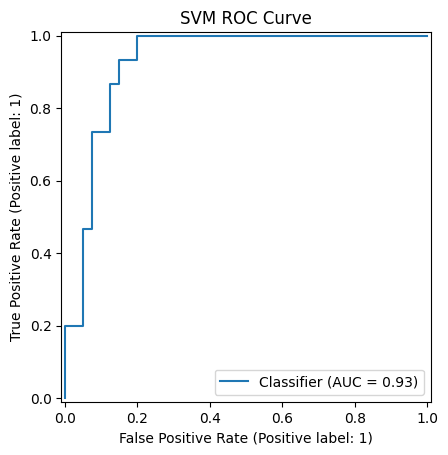

In [6]:
# ----------------------------
# Preprocessing: Imputation + Scaling/Encoding
# ----------------------------
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# ----------------------------
# SVM classifier and pipeline
# ----------------------------
svm = SVC(kernel='rbf', probability=True)

param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 0.01, 0.1]
}

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', svm)
])

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# ----------------------------
# Fit model
# ----------------------------
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# ----------------------------
# Predictions
# ----------------------------
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# ----------------------------
# Evaluation
# ----------------------------
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", roc_auc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("SVM ROC Curve")
plt.show()


In [8]:
import pickle
import os

# Create directory if it does not exist
os.makedirs('models/svm', exist_ok=True)

svm_model_path = 'models/svm/3c_svm_code_micheleterribile copy'

# Save the trained pipeline (preprocessing + SVM)
with open(svm_model_path, 'wb') as file:
    pickle.dump(best_model, file)


In [ ]:
# Identify categorical and numeric columns
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Convert categorical columns to string
X[categorical_features] = X[categorical_features].astype(str)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
svm = SVC(kernel='rbf', probability=True)

param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 0.01, 0.1]
}

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', svm)
])

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", roc_auc)


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("SVM ROC Curve")
plt.show()
